### XGBoost (Extreme Gradient Boosting)
XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of the Gradient Boosting framework. It is designed to be highly efficient, flexible, and portable. XGBoost provides parallel tree boosting (also known as GBDT, GBM) and is the leading machine learning library for regression and classification tasks. Here, we'll focus on XGBoost for regression.

### Key Concepts of XGBoost Regression

1. **Boosting**: Combines the predictions of multiple simple models (trees) to improve overall performance.
2. **Gradient Boosting**: Sequentially adds new models to correct the errors made by existing models.
3. **Regularization**: XGBoost includes regularization terms to penalize model complexity, which helps to avoid overfitting.
4. **Tree Pruning**: XGBoost performs tree pruning and uses the max depth parameter to limit tree depth, which helps prevent overfitting.
5. **Handling Missing Values**: XGBoost can handle missing values internally, making it robust to incomplete datasets.
6. **Parallel Processing**: XGBoost can run in parallel, making it highly efficient on large datasets.

In [1]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a6/32/cd71fbcebde0809c4e911c9f5f65833c2a4bb43defc63d0b9377f3800bda/xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl.metadata
  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Explanation

1. **Data Generation**:
   - We use `make_regression` to generate synthetic data for a regression problem. The data consists of 1000 samples with one feature, and some noise is added to make the task more realistic.

In [15]:
# Generating synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=2, random_state=42)

2. **Data Splitting**:
   - The data is split into training and testing sets using `train_test_split`.

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. **Model Initialization**:
   - An `XGBRegressor` is initialized with parameters: `objective='reg:squarederror'` for regression, `n_estimators=100` for the number of boosting rounds, `learning_rate=0.1` for the step size shrinkage, and `max_depth=3` for the maximum depth of a tree.

In [17]:
# Initializing XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

4. **Model Training**:
   - The model is trained on the training data using the `fit` method.

In [18]:
# Training the XGBoost Regressor
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

5. **Predictions and Evaluation**:
   - Predictions are made on the test set using the `predict` method.
   - Performance metrics like Mean Squared Error (MSE) and R-squared (R²) are calculated to evaluate the model.

In [19]:
# Making predictions on the test set
y_pred = xgb_regressor.predict(X_test)

In [20]:
# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.196110558507476
R-squared: 0.9822271308617035


6. **Visualization**:
   - The actual vs. predicted values are plotted. The scatter plot shows the actual data points, and the predicted data points are overlaid in red. The prediction line represents the model's predictions over the sorted test data.

This example demonstrates how to implement XGBoost Regression and visualize its predictions. You can further optimize the model by tuning hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, and others.

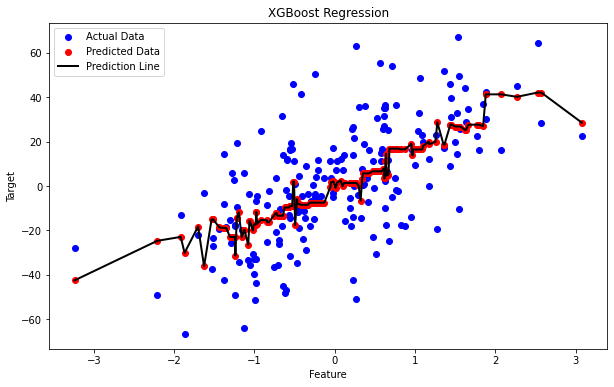

In [14]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.plot(np.sort(X_test, axis=0), xgb_regressor.predict(np.sort(X_test, axis=0)), color='black', linewidth=2, label='Prediction Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('XGBoost Regression')
plt.legend()
plt.show()